In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from src.utils import load_data, get_summary_stats, save_table, vectorized_vs_loop

DATA_PATH = "data/starter_data.csv"
PROCESSED_DIR = "data/processed"

arr = np.array([1, 2, 3, 4, 5], dtype=np.float64)

elemwise = {
    "arr": arr,
    "arr_squared": arr**2,
    "arr_plus_10": arr + 10,
    "poly": arr**2 + 2*arr + 1,  # (arr + 1)^2
}
elemwise

# utils.py
results = vectorized_vs_loop(n=100_000)  
results



{'t_loop_s': 0.02480509993620217,
 't_vectorized_s': 0.0008011001627892256,
 'speedup_x': 30.963793403607813}

In [2]:
df = load_data(DATA_PATH)
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  10 non-null     object
 1   value     10 non-null     int64 
 2   date      10 non-null     object
dtypes: int64(1), object(2)
memory usage: 372.0+ bytes


In [3]:
summary_global = get_summary_stats(df)
summary_global

category_col = "category"

summary_by_cat = get_summary_stats(df, by=category_col)
summary_by_cat


,category,value_count,value_mean,value_std,value_min,value_median,value_max
0,A,4,11.500000,1.290994,10,11.5,13
1,B,3,15.666667,2.081666,14,15.0,18
2,C,3,27.666667,2.516611,25,28.0,30


In [4]:
save_table(
    summary_by_cat,
    out_csv=f"{PROCESSED_DIR}/summary_by_category.csv",
    out_json=f"{PROCESSED_DIR}/summary_by_category.json"
)


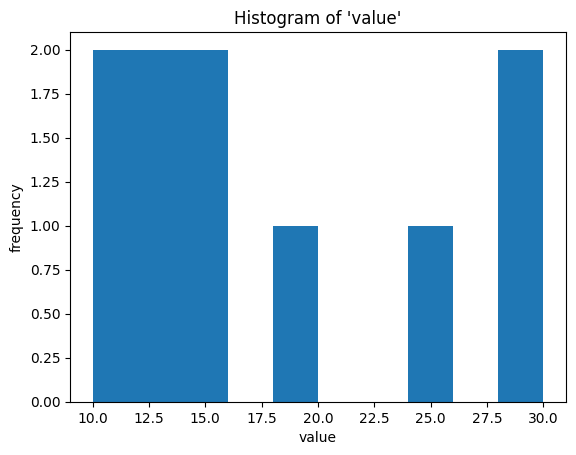

Plot saved at: data/processed/hist_value.png


In [5]:
plt.figure()
df["value"].plot(kind="hist", bins=10, title="Histogram of 'value'")
plt.xlabel("value")
plt.ylabel("frequency")

# save plot
plot_path = f"{PROCESSED_DIR}/hist_value.png"
plt.savefig(plot_path, dpi=150, bbox_inches="tight")
plt.show()

print(f"Plot saved at: {plot_path}")